In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


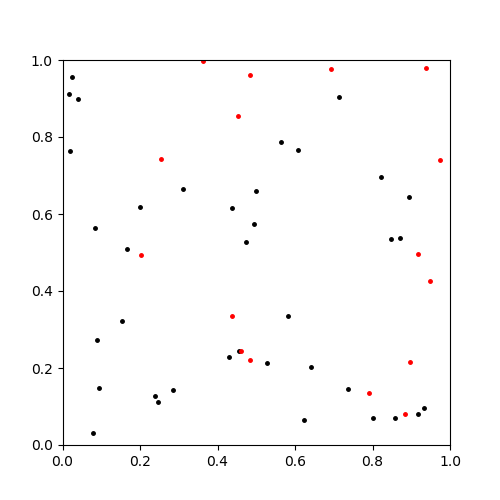

<IPython.core.display.Javascript object>


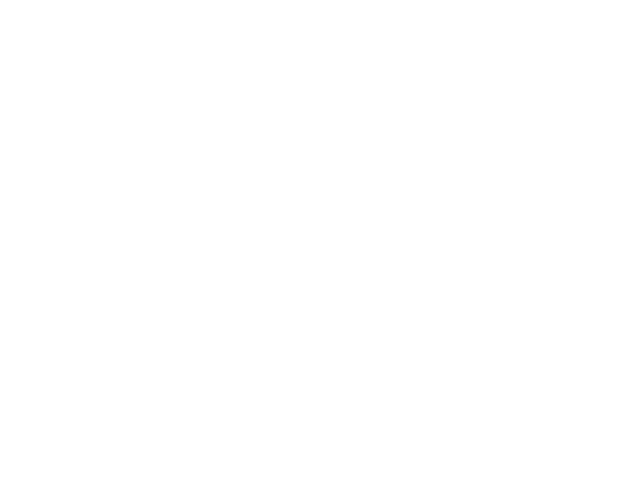

Text(0, 0.5, 'Estimate of the number of turtles')

In [3]:
%matplotlib notebook

nanimals = 100
nsteps = 20
trapsize = 0.5

vmin= 0.3
vmax=0.6

x = np.random.uniform(size=nanimals)
y = np.random.uniform(size=nanimals)
vx = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)
vy = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)

color = np.where(np.logical_and(x<trapsize , y<trapsize), 1, 0)
marked = np.sum(color)

estimation = np.zeros(nsteps)

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(nsteps):
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
    vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
    
    totalrecap = np.sum(np.logical_and(x<trapsize, y<trapsize))
    markedrecap = np.sum(np.logical_and(x<trapsize, y<trapsize)*color)
    estimation[t] = (marked+1)/(markedrecap+1)*(totalrecap)-1
    
    ax.clear()
    plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
    plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw()

plt.figure()
plt.plot(estimation)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')

<IPython.core.display.Javascript object>


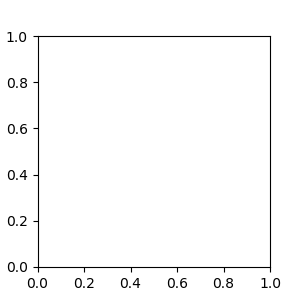

ValueError: operands could not be broadcast together with shapes (100,2) (100,) 

In [25]:
%matplotlib notebook

nanimals = 50
nsteps = 100
ntrials = 2
trapsize = 0.4
flag_dot_plot = True
vmin= 0.3
vmax=0.6

history = np.zeros((nsteps, ntrials)) # I saw this on google, Hopefully it remember past estimations?? 


fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()
        
for itrials in range(ntrials):
    x = np.random.uniform(size=nanimals)
    y = np.random.uniform(size=nanimals)
    vx = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)
    vy = np.random.uniform(size=nanimals, low=vmin, high=vmax)*(2*np.random.randint(size=nanimals, low=0, high=2)-1)
    
    color = np.where(np.logical_and(x<trapsize , y<trapsize), 1, 0)
    marked = np.sum(color)
    
    estimation = np.zeros(nsteps)
    
    for t in range(nsteps):
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

        totalrecap = np.sum(np.logical_and(x<trapsize, y<trapsize))
        markedrecap = np.sum(np.logical_and(x<trapsize, y<trapsize)*color)
        estimation[t] = (marked+1)/(markedrecap+1)*(totalrecap)-1
    
    if flag_dot_plot:
        ax.clear()
        plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
        plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw()
        
    history = (history + estimation)/2 

plt.figure()
plt.plot(history) # Plotting the average
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles');

I don''t think I'm understanding trap placement as well as i am understanding trapsize. I got that trapsize regulates the number of marked vs non marked turtles in the recapture but i don't understand yet how to restrict the direction/space they are moving in

class Const:
    def __init__(self):
        self.nanimals = 50
        self.nsteps = 100
        self.ntrials = 2
        self.vmin= 0.3
        self.vmax=0.6
        self.trapsize = 0.4
        self.flag_dot_plot = True
c = Const()
print(c.vmax)
c.vmax = vmax + vmin
print(c.vmax)

In [13]:
%matplotlib notebook

class Const:
    def __init__(self):
        self.nanimals = 50
        self.nsteps = 100
        self.ntrials = 2
        self.vmin= 0.3
        self.vmax=0.6
        self.trapsize = 0.4
        self.flag_dot_plot = False

In [14]:
def model(c):
    history = np.zeros((c.nsteps, c.ntrials))
    
    for itrials in range(c.ntrials):
        x = np.random.uniform(size=c.nanimals)
        y = np.random.uniform(size=c.nanimals)
        vx = np.random.uniform(size=c.nanimals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.nanimals, low=0, high=2)-1)
        vy = np.random.uniform(size=c.nanimals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.nanimals, low=0, high=2)-1)
    
        color = np.where(np.logical_and(x<c.trapsize , y<c.trapsize), 1, 0)
        marked = np.sum(color)
    
        estimation = np.zeros(c.nsteps)
    
        if c.flag_dot_plot:
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show

        for t in range(c.nsteps):
            x += vx
            y += vy

            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            totalrecap = np.sum(np.logical_and(x<c.trapsize, y<c.trapsize))
            markedrecap = np.sum(np.logical_and(x<c.trapsize, y<c.trapsize)*color)

            estimation[t] = (marked+1)/(markedrecap+1)*(totalrecap)-1

            if c.flag_dot_plot: # Actual animation
                ax.clear()
                plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
                plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw()
                
        history[:,itrials] = estimation
    return history

<IPython.core.display.Javascript object>


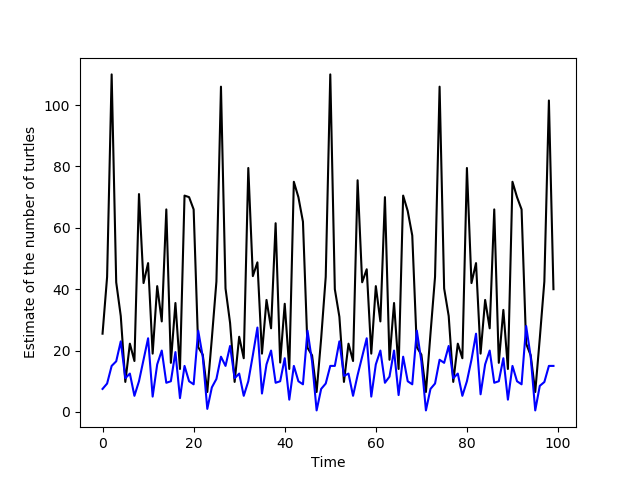

In [15]:
#Main porgram

c=Const()
curve1 = np.mean(model(c),axis=1)
c.trapsize=0.3
curve2 = np.mean(model(c),axis=1)

plt.figure()
plt.plot(curve1,'k-')
plt.plot(curve2,'b-')
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles');